##### After Creating an account, an instance and an API Key, you are ready to connect to a quantum device

In [17]:
!pip install qiskit qiskit-ibm-runtime matplotlib

In [18]:
from qiskit import qasm, qasm2,qasm3
from qiskit.circuit import QuantumCircuit, ClassicalRegister, Gate, library
from qiskit.transpiler import generate_preset_pass_manager
from qiskit_ibm_runtime import QiskitRuntimeService, Batch, SamplerV2 as Sampler

import numpy as np
from matplotlib import pyplot as plt

In [25]:
from qiskit_ibm_runtime import QiskitRuntimeService

service = QiskitRuntimeService(
    channel='ibm_quantum',
    instance='ibm-q/open/main',
    token='d786b5d89b9478db9ef40cf3a486a89dd64a3aa9019141a60bfcd138f11332aa92ba8e31aa9cb589e085c9e672e8ba6a3e6e252b1d8fa9ce7309d94899575b0c'
)

# Or save your credentials on disk.
# QiskitRuntimeService.save_account(channel='ibm_quantum', instance='ibm-q/open/main', token='d786b5d89b9478db9ef40cf3a486a89dd64a3aa9019141a60bfcd138f11332aa92ba8e31aa9cb589e085c9e672e8ba6a3e6e252b1d8fa9ce7309d94899575b0c')

In [29]:
# Print all available backends you can use
for backend in service.backends():
    print(backend.name)

ibm_brisbane
ibm_sherbrooke
ibm_kyiv


In [32]:
backend = service.backend("ibm_kyiv")


In [26]:
## Load the circuit you would like to run
circuit = QuantumCircuit.from_qasm_file('/content/P3__sharp_peak.qasm')

## In case qasm instructions do not contain measurement instructions, we can add them here
circuit.measure_all()
print(circuit.count_ops())

OrderedDict([('u3', 399), ('cz', 178), ('measure', 44), ('barrier', 1)])


In [33]:
## We have to transpile the circuits to a physical device, device connectivy, basis gate set etc.
## For more details see: https://docs.quantum.ibm.com/api/qiskit/transpiler
optimization_level = 3
pm = generate_preset_pass_manager(optimization_level,
                                  backend=backend)

tp_circuit = pm.run(circuit)

print(tp_circuit.count_ops())
# tp_circuit.draw('mpl', fold=-1, idle_wires=False)

OrderedDict([('rz', 985), ('sx', 771), ('ecr', 178), ('measure', 44), ('barrier', 1)])


#### Run a circuit on a quantum device

In [34]:
sampler = Sampler(backend, options={"default_shots": 100000})

## In sampler we run pubs, which is a collection/list of circuits or tuples of circuits and parameters: https://docs.quantum.ibm.com/api/qiskit/qiskit.primitives.BackendSamplerV2
job = sampler.run([tp_circuit])
print(job.job_id())


czxaw9hqnmvg008vzc0g


In [36]:
## we can either retrieved the data directly from the job, or if we have the job_id, we can retrieve it with:
job = service.job('czxaw9hqnmvg008vzc0g')
counts = job.result()[0].data.meas.get_counts()

## we sort the count dictionary from highest count to lowest
sorted_cts_dict={k: v for k, v in sorted(counts.items(), key=lambda item: item[1], reverse=True)}

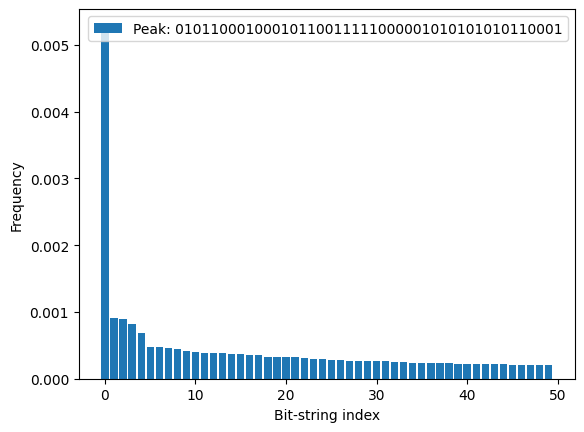

In [37]:
cutoff = 50 #how many bitstrings we want to plot
val_list = list(sorted_cts_dict.values())
string_list = list(sorted_cts_dict.keys())
plt.bar(range(cutoff), np.array(val_list)[0:cutoff]/sum(val_list), label = f"Peak: {string_list[0]}")
plt.ylabel('Frequency')
plt.xlabel('Bit-string index')
plt.legend()
plt.show()
